 <h1> ADRIÁN HERNÁNDEZ PADRÓN😂</h1>

<center>
<h2> Interpolacion de lagrange </h2>
</center>

Dada un conjunto de nodos ${\{x_0, x_1, ..., x_k\}}$ el método de interpolación de Lagrange nos proporciona el polinomio interpolador $L(x)$ que tiene la siguiente forma:

<center>
<h3> $L(x)=\sum_{i=0}^{k}f(x_i)\cdot{l_x}$ </h3>
</center>

donde los $l_x$ son las denominadas bases polinómicas de Lagrange, que tienen la forma:

<center>
<h3>$\prod_{i=0;i\not={j}}^{k}\dfrac {x-x_{i}}{x_{j}-x_{i}}  $ </h3>
</center>

Polinomio de Lagrange:
0.958851077208406*x*(-0.4*x + 1.2) + 0.0470400026866224*x*(0.4*x - 0.2)

Polinomio de Lagrange simplificado: 
-0.364724429808713*x**2 + 1.14121329211276*x
El error máximo en la interpolación es:
0.10734687123563835
El error en un punto a:
0.06498212250384727


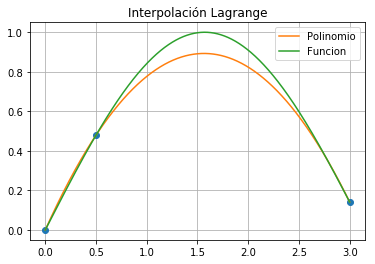

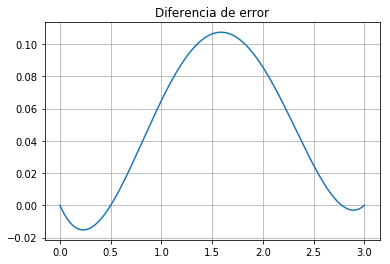

In [6]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from pylab import *

def p(X):
    p=sin(X)  # Esta es la función que vamos a interpolar
    return p
xi = np.array([0., 0.5 , 3.])
n = len(xi)
yi = p(xi)
#Los puntos para la gráfica irán desde el valor mínimo de los datos hasta el máximo
a = np.min(xi)
b = np.max(xi)

xip = np.linspace(a,b, 1001)#Mi rango de datos para la funcion que quiero intorpolar irá desde el valor mínimo de los datos hasta el máximo, el numero de interacciones será aquel para que coincida con el polinomio interpolador.
funcion = p(xip)

x = sym.Symbol('x')
polinomio = 0
for i in range(0,n,1): #Con un bucle podemos crear un sumatorio que haga todas las l0n, l1n,...,Lnn operaciones
    termino = 1
    for j  in range(0,n,1):
        if (j!=i):
            termino *= (x-xi[j])/(xi[i]-xi[j])
    polinomio += termino*yi[i] #Lo multiplicamos por las yi para formar el polinomio
#Simplificamos el polinomio
px = polinomio.expand()

#Los valores de y para la representación del polinomio
pxn = sym.lambdify(x,polinomio)
yip = pxn(xip)

#Errores
z = 1 #Punto en el que quiero calcular el error
funcionerror = p(z) #Msima función evaluada en el punto z para hallar el error en dicho punto
errorx = (abs(funcionerror-pxn(z)))

#Imprimimos por pantalla los resultados
print('Polinomio de Lagrange:')
print(polinomio)
print()
print('Polinomio de Lagrange simplificado: ')
print(px)
print('El error máximo en la interpolación es:')
print (max(abs(funcion-yip)))
print ('El error en un punto a:')
print (errorx)

#Montamos la Gráfica
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o')
plt.plot(xip,yip, label = 'Polinomio')
plt.plot(xip, funcion, label ='Funcion')
plt.legend()
plt.grid(True)
plt.show()
plt.title('Diferencia de error')
plt.plot(xip, funcion -yip)
plt.grid(True)
plt.show()

<h2> Interpolacion de lagrange </h2>

<center>
<h3> Interpolación de Newton </h3>
</center>

La interpolación de Newton es un método que nos proporciona el polinomio interpolador dada una serie de puntos $\{ x_0, y_0; x_1,y_1, ... , x_k, y_k \}$.


Definimos en primer lugar la pendiente de orden $n$ de forma recursiva, de forma que tenemos: <br>

$f_0(x_i)$, definido como el término i-ésimo <br>

$f_1(x_0, x_1)$=$\frac{f_0(x_1)-f_0(x_0)}{x_1-x_0}$ <br>

$f_2(x_0, x_1, x_2)= \frac{f_1{(x_1,x_2)}-f_1(x_0,x_1)}{x_2-x_0} $

...

En general, vamos a definir el polinomio interpolador según la siguiente fórmula:


<center>
$p_i(x)=p_{i-1}+ f_i(x_0, x_1,..., x_i)$ $\prod_{j=0}^{i-1}(x-x_j)$
</center>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from pylab import *

def Newtoninterpol(dat):
    #la funcion Newtoninterpol crea un objeto que evalua un polinomio en un cierto valor de x
    n = len(dat)
    F = np.zeros((n, n)) # creamos una matriz de arrays de ceros de nxn dimensiones.

    for i, p in enumerate(dat):  # condiciones iniciales para las diferencias divididas. Creamos que nuestras y en los datos formen la primera columna del array.
        F[i][0] = p[1]

    for i in range(1, n):  # tabla de diferencias divididas
        for j in range(1, n): 
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])
        

    def T(k, x):  # Nos encargamos de los terminos (x − x0)(x − x1). . .(x − xn−1) que multiplican a f[xn, xn−1, . . . , x2, x1, x0]
        var = 1.0
        for i, p in enumerate(dat):
            if i <= k:
                var *= (x-p[0])
        return var

    def P(x):  #Por ultimo montamos el polinomio
        termino = 0.0
        for i in range(1, n):
            termino += F[i][i]*T(i-1, x) 
        return termino + F[0][0]
    

    return F, P

def po(X):
    p=sin(X)  # Esta es la función que vamos a interpolar
    return p

xi = np.array([0., 0.5 , 3.])
y = po(xi) #Saco los valores de la x en los que se va a mover mi función
n = len(xi)
datos = np.zeros(2*n).reshape(n, 2) #Realizo un for de manera que pueda introducir los datos en un array de n arrays con dos valores cada array para poder formar una tabla
for k in range(0, n):
    datos[k][0] = xi[k] #La posicion [n][0] corresponde a las x,
    datos[k][1] = y[k] #La posicion [n][1] corresponde a las y.
table, Pn = Newtoninterpol(datos)

arr = []
for p in range(0, n): #Saco los valores de la x en los que se va a mover mi función
        arr.append(datos[p][0])
a = np.min(arr)
b = np.max(arr)
xi = np.linspace(a,b, 1001) #Doy valores a mi función desde el primer dato hasta el ultimo, cogiendo valores cada 0,001
yi = np.zeros(np.size(xi))
for i in range(np.size(xi)):
    yi[i]=Pn(xi[i])
funcion = po(xi) #Funcion que queremos interpolar

#Errores
z = 1
funcionerror = po(z) #Msima función evaluada en el punto z para hallar el error en dicho punto
errorx = (abs(funcionerror-Pn(z)))

#Para mostrar el polinomio hacemos lo siguiente:
df = pd.DataFrame(table) #Me ayudo de pandas para mostrar de manera mas limpia la tabla de resultados que da nuestra función
#print(df)

x = sym.Symbol('x')
polinomio = 0.
for i in range(0, n):
    var = 1
    for j in range(0, i):
        var *= (x-datos[j][0])
    polinomio += df[i][i]*var
pxn = sym.lambdify(x,polinomio)
px = polinomio.expand()
#Imprimimos los resultados por pantalla
print('Expresión del polinomio de Newton:')
print(polinomio)
print('Polinomio de Newton simplificado:')
print(px)
print('El error máximo en la interpolación es:')
print(max(abs(funcion-yi)))
print ('El error en un punto a:')
print(errorx)
#Graficamos
plt.title('Interpolación de Newton')   
for p in datos: #Hacemos un bucle para que coja todos nuestros datos.
    plt.scatter(p[0],p[1],c ='k') 
plt.plot(xi,yi,label='Polinomio')
plt.plot(xi,funcion, label ='Funcion')
plt.legend()
plt.grid(True)
plt.show()
plt.title('Diferencia de error')
plt.plot(xi, funcion-yi)
plt.grid(True)
plt.show()

Expresión del polinomio de Newton:
-0.364724429808713*x*(x - 0.5) + 0.958851077208406*x
Polinomio de Newton simplificado:
-0.364724429808713*x**2 + 1.14121329211276*x
El error máximo en la interpolación es:
0.10734687123563813
El error en un punto a:
0.06498212250384716


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>